In [1]:
from keras.models import Sequential

model = Sequential()

Using TensorFlow backend.


In [2]:
from keras.layers import Dense, Flatten, MaxPooling2D, Convolution2D

In [3]:

model = Sequential()
model.add(Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(output_dim=128,activation='relu'))
model.add(Dense(output_dim=1, activation='sigmoid'))

C:\Users\asitd\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\asitd\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\asitd\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  import sys


In [4]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [7]:

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
            target_size=(64,64),
            batch_size=32,
            class_mode='binary')

Found 8000 images belonging to 2 classes.


In [9]:
test_set= test_datagen.flow_from_directory('dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [14]:
history = model.fit_generator(
        training_set,
        steps_per_epoch=500,
        epochs=20,
        validation_data=test_set,
validation_steps=100)

Epoch 1/20
500/500 [==============================] - 203s 406ms/step - loss: 0.4865 - acc: 0.7615 - val_loss: 0.5057 - val_acc: 0.7601
Epoch 2/20
500/500 [==============================] - 211s 422ms/step - loss: 0.4698 - acc: 0.7720 - val_loss: 0.5442 - val_acc: 0.7443
Epoch 3/20
500/500 [==============================] - 212s 425ms/step - loss: 0.4575 - acc: 0.7820 - val_loss: 0.5374 - val_acc: 0.7604
Epoch 4/20
500/500 [==============================] - 221s 442ms/step - loss: 0.4351 - acc: 0.7930 - val_loss: 0.5248 - val_acc: 0.7701
Epoch 5/20
500/500 [==============================] - 228s 455ms/step - loss: 0.4238 - acc: 0.7997 - val_loss: 0.5242 - val_acc: 0.7742
Epoch 6/20
500/500 [==============================] - 263s 525ms/step - loss: 0.4095 - acc: 0.8064 - val_loss: 0.5370 - val_acc: 0.7679
Epoch 7/20
500/500 [==============================] - 235s 471ms/step - loss: 0.3965 - acc: 0.8176 - val_loss: 0.5307 - val_acc: 0.7751
Epoch 8/20
500/500 [============================

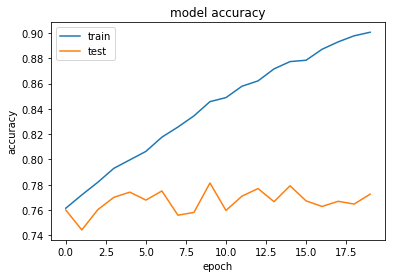

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
# from IPython.display import Inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

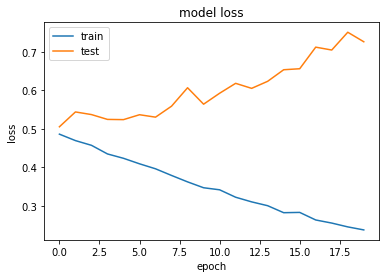

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
test_set

In [13]:
from sklearn.metrics import accuracy_score